<a href="https://colab.research.google.com/github/adishukla2009/PGP-ML-Course/blob/Ensemble-Techniques/Ensemble_Techniques_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Description: 

The data is related with direct marketing campaigns of a Portuguese banking institution.
The marketing campaigns were based on phone calls. Often, more than one contact to
the same client was required, in order to access if the product (bank term deposit) would
be ('yes') or not ('no') subscribed. 

# Context:

Leveraging customer information is paramount for most businesses. In the case of a bank,
attributes of customers like the ones mentioned below can be crucial in strategizing a
marketing campaign when launching a new product.


# Attribute Information:

1. age (numeric)
2. job : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown';
note: 'divorced' means divorced or widowed)
4. education (categorical:
primary, secondary, tertiary,'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical: 'cellular','telephone')
10.day: last contact day of the month (numeric 1 -31)
11.month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12.duration: last contact duration, in seconds (numeric). Important note: this
attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet,
the duration is not known before a call is performed. Also, after the end of the
call y is obviously known. 
13.campaign: number of contacts performed during this campaign and for this
client (numeric, includes last contact)
14.pdays: number of days that passed by after the client was last contacted from a
previous campaign (numeric; 999 means client was not previously contacted)
15.previous: number of contacts performed before this campaign and for this client
(numeric)
16.poutcome: outcome of the previous marketing campaign (categorical:
'failure','nonexistent','success')
17.target: has the client subscribed a term deposit? (binary: "yes","no")



## Import necessary Librariries

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import zscore


## Read the data

In [0]:
Bank_data = pd.read_csv("bank-full.csv")
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Describe the data

In [0]:
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Shape of data

In [0]:
print (Bank_data.shape)

(45211, 17)


# Checking for missing values and looking at the data types

Looking at the values there are no missing values 

In [0]:
print (Bank_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


## 5 point summary of the data 

We have replaced the Yes and No in target and made the coolumn as numerical
looking at the summary below aare the analysis points 
* Almost all values in pdays are -1 as up till 75%ile we are getting -1 
* Also Target has very low count of 1 - this means that we might be having an unbalanced dataset


In [0]:
Bank_data.replace({'Target': {"yes": 1,'no':0}},inplace=True)
Bank_data.describe().tail(5)

,age,balance,day,duration,campaign,pdays,previous,Target
min,18.0,-8019.0,1.0,0.0,1.0,-1.0,0.0,0.0
25%,33.0,72.0,8.0,103.0,1.0,-1.0,0.0,0.0
50%,39.0,448.0,16.0,180.0,2.0,-1.0,0.0,0.0
75%,48.0,1428.0,21.0,319.0,3.0,-1.0,0.0,0.0
max,95.0,102127.0,31.0,4918.0,63.0,871.0,275.0,1.0


# Cleaning up data 
* Since there are a lot many rows with pdays as -1 and it was not advisable to remove all the rows . I would remove pdays as an attribute



In [0]:

P_Bank_data = Bank_data.drop('pdays',axis =1)

P_Bank_data .head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,unknown,0


## Below you can see the imbalance of dataset - Around 88 % as 0 and only 12% as 1

In [0]:
P_Bank_data['Target'].value_counts()

0    39922
1     5289
Name: Target, dtype: int64

# Univariate Analysis 

* Age is mostly concentrated around mid 30s 
* Balance duration and Previous are almost all 0



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb87285ffd0>,
      dtype=object)

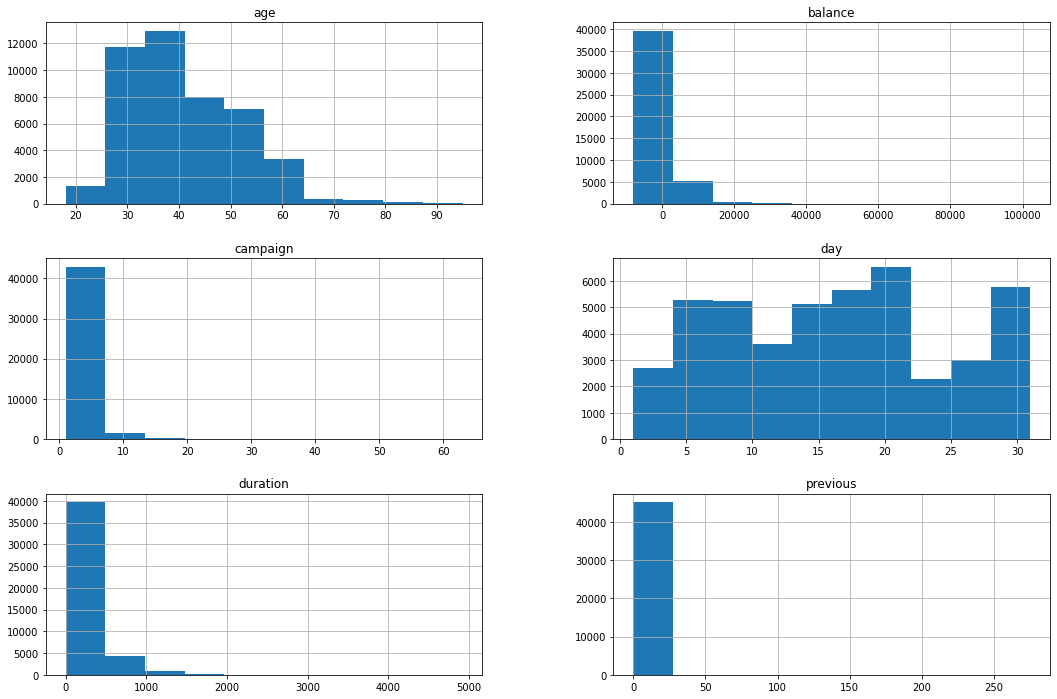

In [0]:
# Frequency distribution of Nmerical columns
P_Bank_data.hist(column= ['age','balance','day','duration','campaign','previous'],figsize=(18,12))

# Frequency distribution of categorical columns 



* Management looks like the profession most interested in a term deposit
* Tertiary Education group has the highest % contribution within a group 
* The group with no housing loan is more interested in Term deposit 




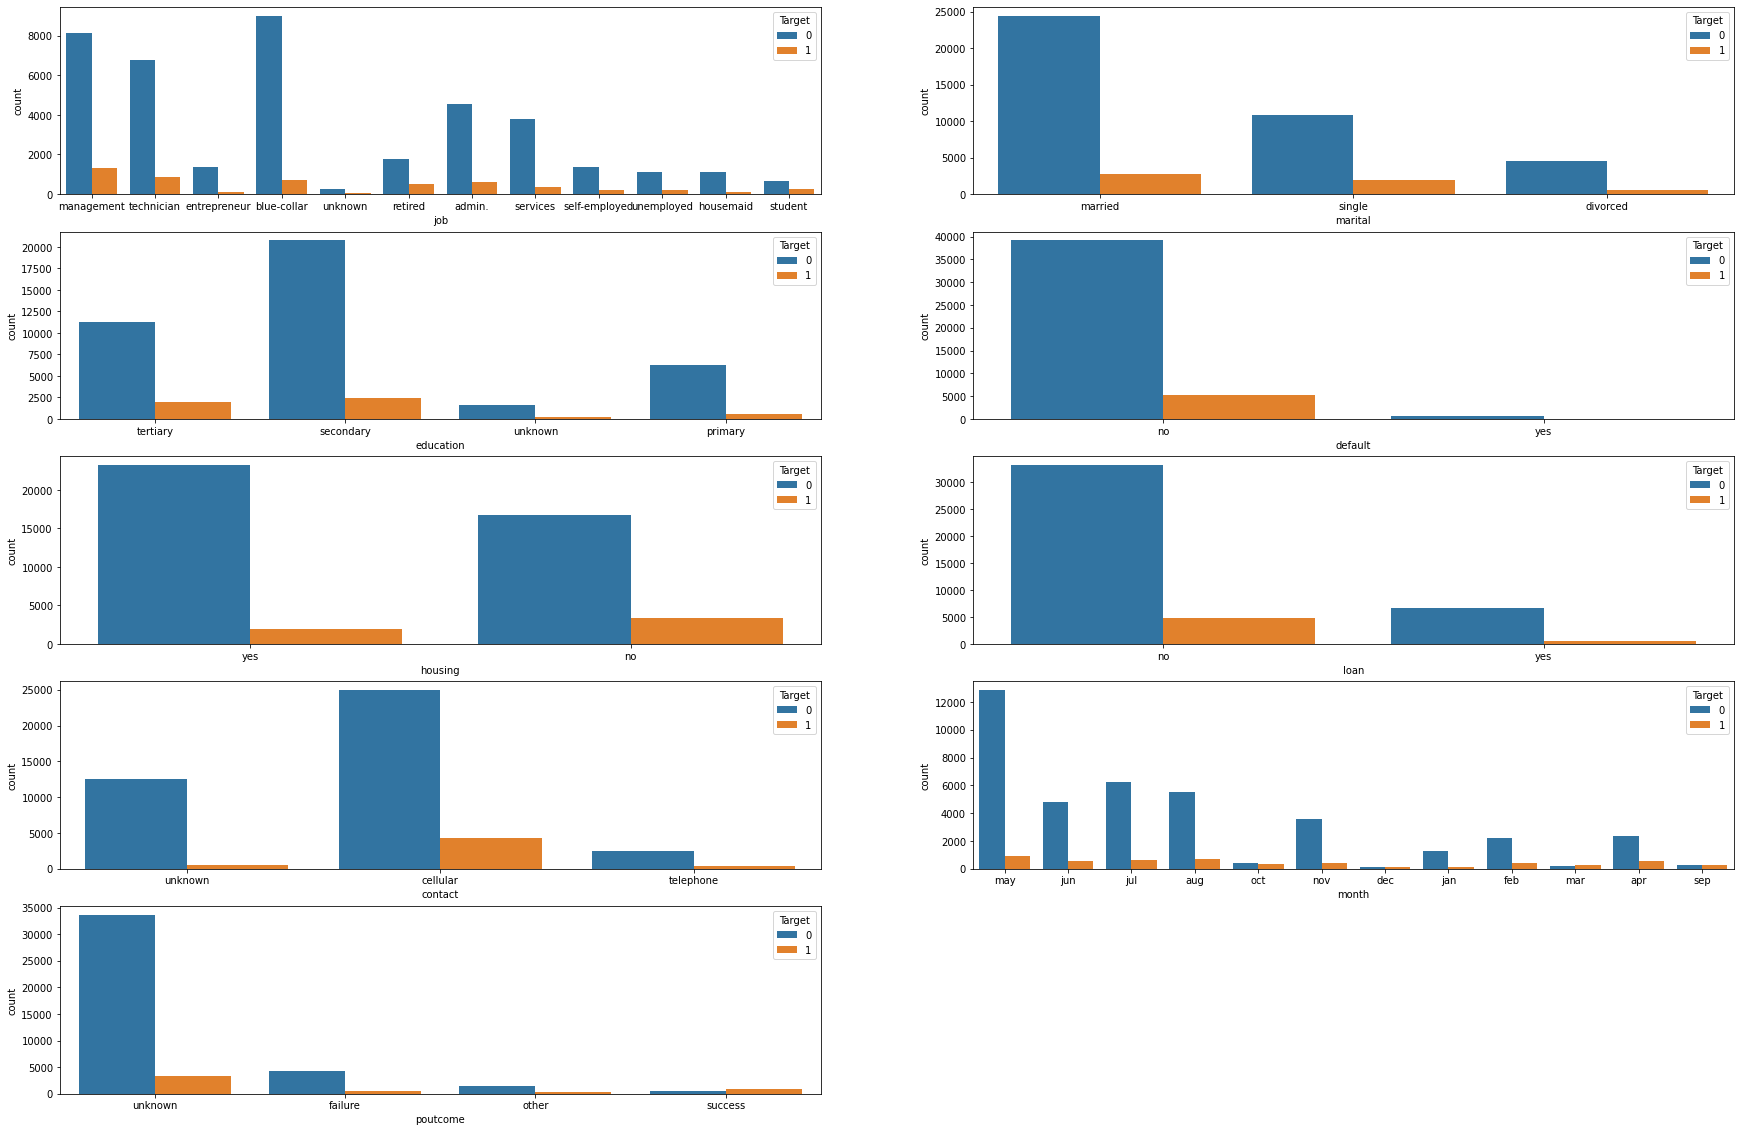

In [0]:
# Frequency distribution of Categorical columns
plt.figure(figsize= (30,20))
plt.subplot(5,2,1)
sns.countplot(data=P_Bank_data,x='job', hue='Target')
plt.subplot(5,2,2)
sns.countplot(data=P_Bank_data,x='marital', hue='Target')
plt.subplot(5,2,3)
sns.countplot(data=P_Bank_data,x='education', hue='Target')
plt.subplot(5,2,4)
sns.countplot(data=P_Bank_data,x='default', hue='Target')
plt.subplot(5,2,5)
sns.countplot(data=P_Bank_data,x='housing', hue='Target')
plt.subplot(5,2,6)
sns.countplot(data=P_Bank_data,x='loan', hue='Target')
plt.subplot(5,2,7)
sns.countplot(data=P_Bank_data,x='contact', hue='Target')
plt.subplot(5,2,8)
sns.countplot(data=P_Bank_data,x='month', hue='Target')
plt.subplot(5,2,9)
sns.countplot(data=P_Bank_data,x='poutcome', hue='Target')




# Correlation matrix

Not much in the way of correlation but we see some between the Target and the duration


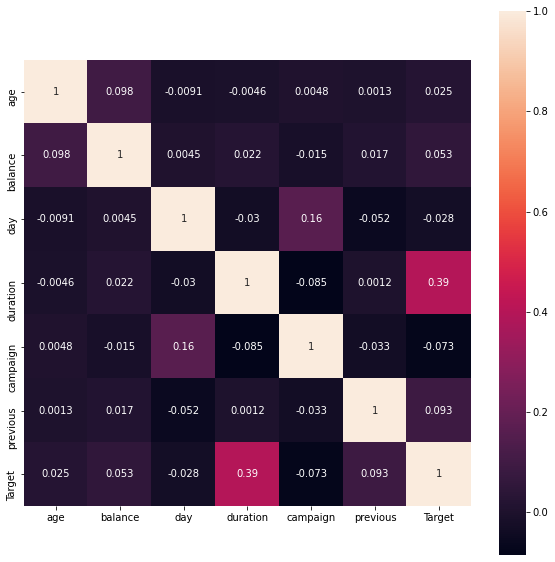

In [0]:
corr = P_Bank_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr,annot=True,square=True)

# Box Plot between Housing and Age 

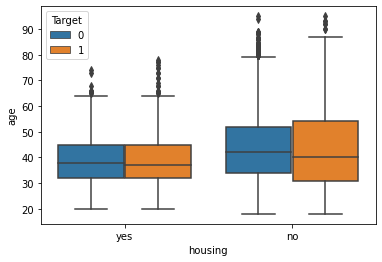

In [0]:
sns.boxplot(y='age', x='housing',hue='Target', data= P_Bank_data )

# Pair Plot 



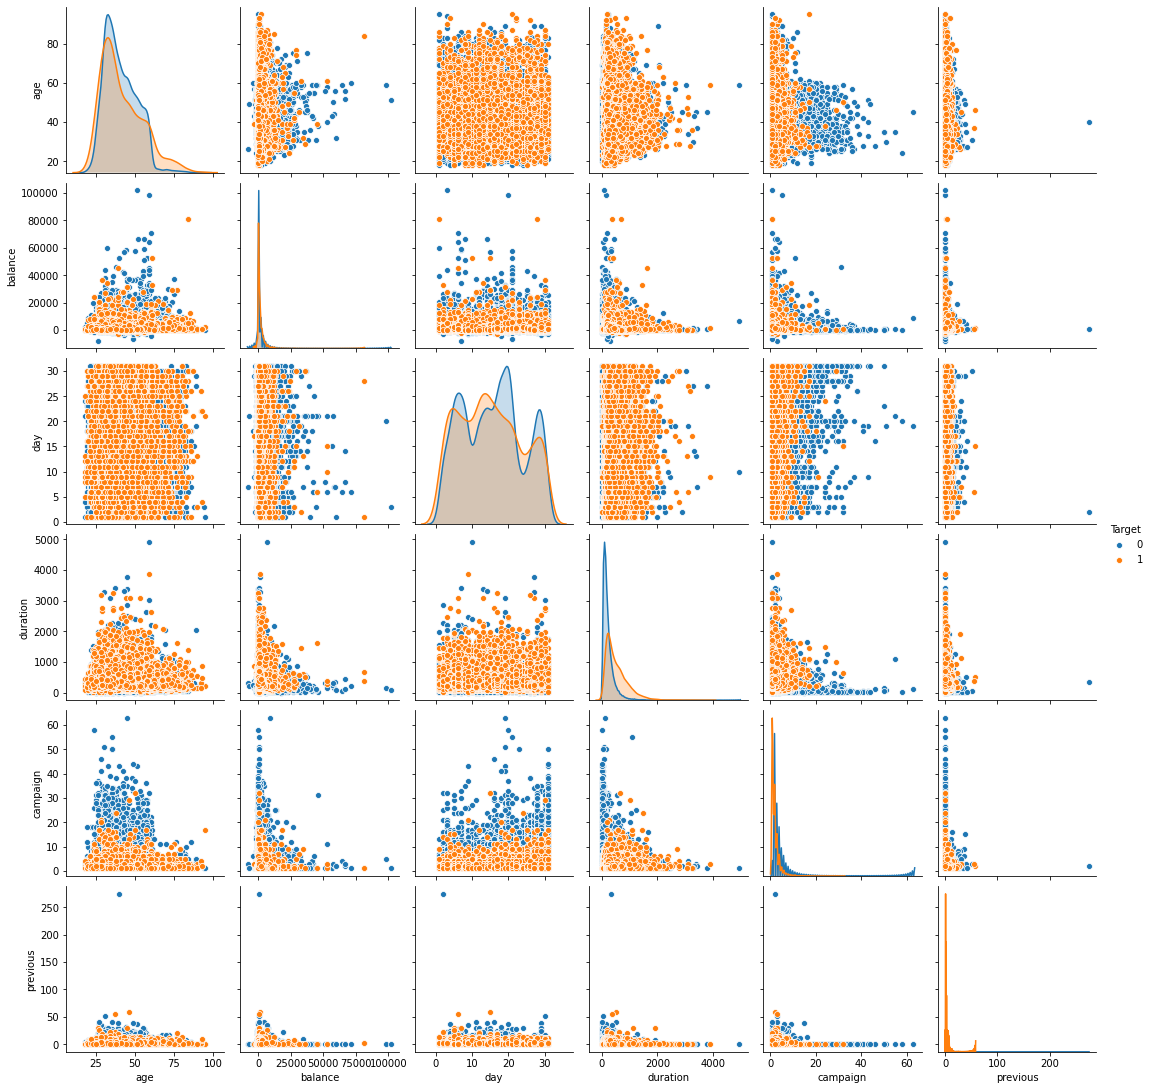

In [0]:
sns.pairplot(P_Bank_data, hue='Target')

# Adding Dummy columns 

In [0]:
Modelling_Bank_data = P_Bank_data.drop('Target',axis=1)
Modelling_Bank_data= pd.get_dummies(data= Modelling_Bank_data, drop_first=True)
Modelling_Bank_data.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


# Normalizing the data

In [0]:
X= Modelling_Bank_data.apply(zscore)
Y= P_Bank_data['Target']
print(X.shape)
print(Y.shape)
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3, random_state=1)


(45211, 41)
(45211,)


# Splitting the data and checking if split is similar between them 

In [0]:
print('{0:0.2f}% data is in the training set '.format ((len(x_train)/len(Modelling_Bank_data.index)) *100))
print('{0:0.2f}% data is in the test set '.format ((len(x_test)/len(Modelling_Bank_data.index)) *100))

70.00% data is in the training set 
30.00% data is in the test set 


In [0]:
print("Number of people opting for Term Deposit in Original data   : {0} ({1:0.2f}%)".format(len(P_Bank_data.loc[P_Bank_data['Target'] == 1]), (len(P_Bank_data.loc[P_Bank_data['Target'] == 1])/len(P_Bank_data.index)) * 100))
print("Number of people not opting for Term Deposit in Original data   : {0} ({1:0.2f}%)".format(len(P_Bank_data.loc[P_Bank_data['Target'] == 0]), (len(P_Bank_data.loc[P_Bank_data['Target'] == 0])/len(P_Bank_data.index)) * 100))
print("")
print("Number of people opting for Term Deposit in Training data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Number of people Not opting for Term Deposit in Training data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Number of people opting for Term Deposit in Test data          : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Number of people Not opting for Term Deposit in Test data       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Number of people opting for Term Deposit in Original data   : 5289 (11.70%)
Number of people not opting for Term Deposit in Original data   : 39922 (88.30%)

Number of people opting for Term Deposit in Training data    : 3738 (11.81%)
Number of people Not opting for Term Deposit in Training data    : 27909 (88.19%)

Number of people opting for Term Deposit in Test data          : 1551 (11.43%)
Number of people Not opting for Term Deposit in Test data       : 12013 (88.57%)



# Using SMOTE to oversample the minority

*   After various checks ratio of 0.5 was giving better results 



In [0]:

from imblearn.over_sampling import SMOTE
sm = SMOTE (random_state=1, ratio = 1)
x_train,y_train = sm.fit_sample(x_train,y_train)
print("Number of people opting for Term Deposit in Training data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Number of people Not opting for Term Deposit in Training data    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Number of people opting for Term Deposit in Training data    : 27909 (50.00%)
Number of people Not opting for Term Deposit in Training data    : 27909 (50.00%)



# Model building 

Now I would build different models and looking at their score will chose a few of them to build ROC curves and then will do a Grid dearch CV for the best

# 1- Logistic Regression

In [0]:
# Logistic Regression model 
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2  ...        39        40  intercept
0 -0.046194  0.045778  0.019588  ...  0.434646 -0.022902  -1.823041

[1 rows x 42 columns]


In [0]:
model_score_train = model.score(x_train, y_train)
print('The Accuracy of the model on training data set is ', model_score_train)
model_score_test = model.score(x_test, y_test)
print('The Accuracy of the model on test data set is ', model_score_test)
acc_LR = model_score_test


The Accuracy of the model on training data set is  0.8409096338055084
The Accuracy of the model on test data set is  0.8825567679150693


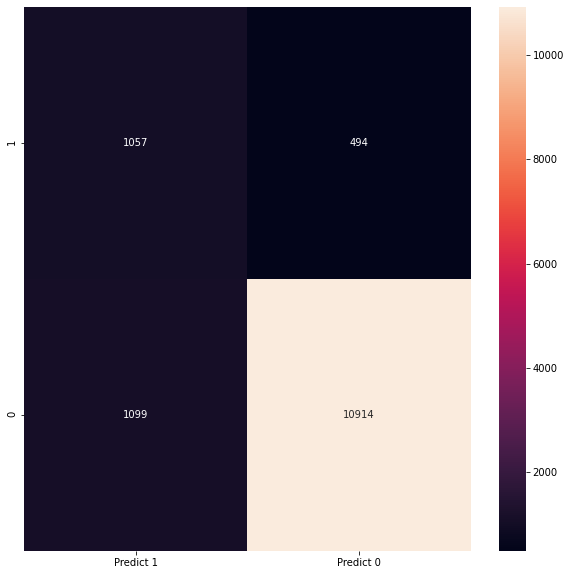

In [0]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))
from sklearn.metrics import precision_score, recall_score, f1_score
pre_LR = precision_score(y_test, y_predict, average='weighted')
rec_LR = recall_score(y_test, y_predict, average='weighted')
f1_LR = f1_score(y_test, y_predict, average='weighted')

resultsDf = pd.DataFrame({'Method':['Logistic Regression'], 'accuracy': acc_LR, 'precision': pre_LR, 'recall' : rec_LR ,'f1 Score' : f1_LR})
resultsDf = resultsDf[['Method', 'accuracy' , 'precision','recall','f1 Score']]



Classification Report
              precision    recall  f1-score   support

           1       0.49      0.68      0.57      1551
           0       0.96      0.91      0.93     12013

    accuracy                           0.88     13564
   macro avg       0.72      0.80      0.75     13564
weighted avg       0.90      0.88      0.89     13564



# 2- Naive Bayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
Loan_model = GaussianNB()

Loan_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
Loan_train_predict = Loan_model.predict(x_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, Loan_train_predict)))
print()

Model Accuracy: 0.7690



In [0]:
Loan_test_predict = Loan_model.predict(x_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, Loan_test_predict)))
acc_NB = metrics.accuracy_score(y_test, Loan_test_predict)




Model Accuracy: 0.8565


Confusion Matrix


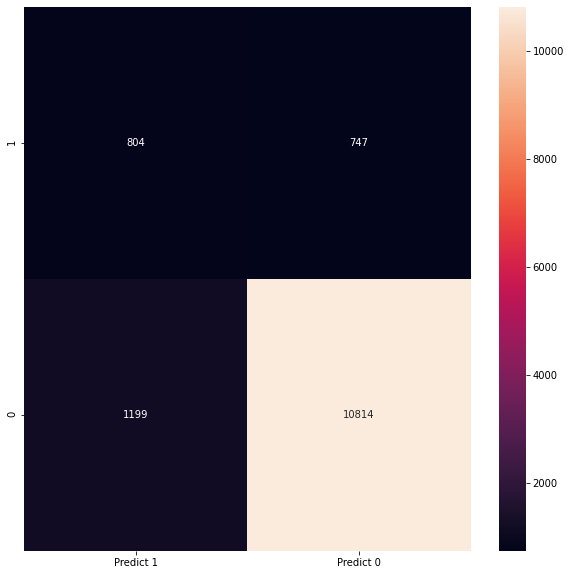

In [0]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, Loan_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True, fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, Loan_test_predict, labels=[1, 0]))

pre_NB = precision_score(y_test, Loan_test_predict, average='weighted')
rec_NB = recall_score(y_test, Loan_test_predict, average='weighted')
f1_NB = f1_score(y_test, Loan_test_predict, average='weighted')

tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'], 'accuracy': acc_NB, 'precision': pre_NB, 'recall' : rec_NB ,'f1 Score' : f1_NB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]



Classification Report
              precision    recall  f1-score   support

           1       0.40      0.52      0.45      1551
           0       0.94      0.90      0.92     12013

    accuracy                           0.86     13564
   macro avg       0.67      0.71      0.68     13564
weighted avg       0.87      0.86      0.86     13564



# 3- K Nearest Neighbours 

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )


In [0]:
NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [0]:
train_Labels =NNH.predict(x_train)
print(NNH.score(x_train, y_train))
predicted_labels = NNH.predict(x_test)
print(NNH.score(x_test, y_test))
acc_NNH= NNH.score(x_test, y_test)


1.0
0.8592598053671483


Confusion Matrix


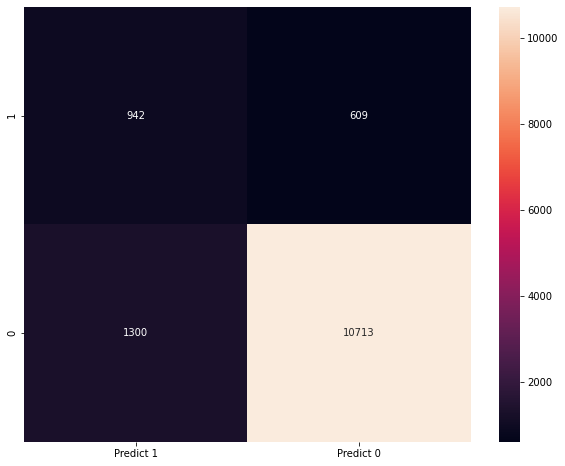

In [0]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, predicted_labels, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True,fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

pre_NNH = precision_score(y_test, predicted_labels, average='weighted')
rec_NNH = recall_score(y_test, predicted_labels, average='weighted')
f1_NNH = f1_score(y_test, predicted_labels, average='weighted')

tempResultsDf = pd.DataFrame({'Method':['K Nearest Neighbours'], 'accuracy': acc_NNH, 'precision': pre_NNH, 'recall' : rec_NNH ,'f1 Score' : f1_NNH})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]


Classification Report
              precision    recall  f1-score   support

           1       0.42      0.61      0.50      1551
           0       0.95      0.89      0.92     12013

    accuracy                           0.86     13564
   macro avg       0.68      0.75      0.71     13564
weighted avg       0.89      0.86      0.87     13564



# 4- Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
model_entropy=DecisionTreeClassifier(criterion='entropy')
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
model_entropy.score(x_train, y_train)  # performance on train data

1.0

In [0]:
model_entropy.score(x_test, y_test)  # performance on test data

0.8607342966676497

In [0]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [0]:
preds_pruned = clf_pruned.predict(x_test)
preds_pruned_train = clf_pruned.predict(x_train)

Confusion Matrix


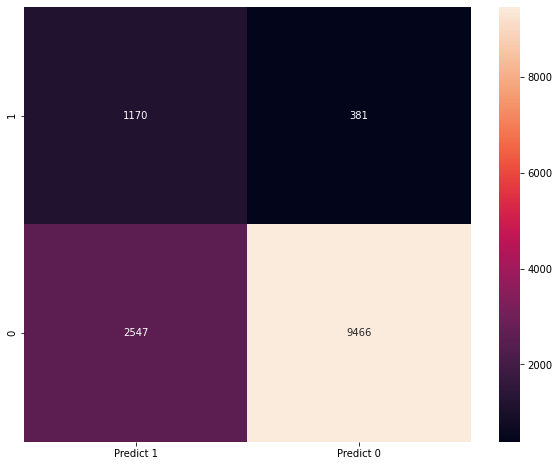

In [0]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, preds_pruned, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True,fmt='g')

In [0]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
print(accuracy_score(y_test,preds_pruned))
print(accuracy_score(y_train,preds_pruned_train))
acc_DT = accuracy_score(y_test,preds_pruned)
pre_DT = precision_score(y_test, preds_pruned, average='weighted')
rec_DT = recall_score(y_test, preds_pruned, average='weighted')
f1_DT = f1_score(y_test, preds_pruned, average='weighted')

print("Classification Report")
print(metrics.classification_report(y_test, preds_pruned, labels=[1, 0]))

0.7841344736066057
0.80352578649404
Classification Report
              precision    recall  f1-score   support

           1       0.31      0.75      0.44      1551
           0       0.96      0.79      0.87     12013

    accuracy                           0.78     13564
   macro avg       0.64      0.77      0.66     13564
weighted avg       0.89      0.78      0.82     13564



In [0]:
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT, 'precision': pre_DT, 'recall' : rec_DT ,'f1 Score' : f1_DT})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]


# 5-Random Forest classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1)
rfcl = rfcl.fit(x_train, y_train)

In [0]:
pred_RF = rfcl.predict(x_test)
acc_RF = accuracy_score(y_test, pred_RF)
pre_RF = precision_score(y_test,pred_RF, average='weighted')
rec_RF = recall_score(y_test, pred_RF, average='weighted')
f1_RF = f1_score(y_test, pred_RF, average='weighted')

Confusion Matrix


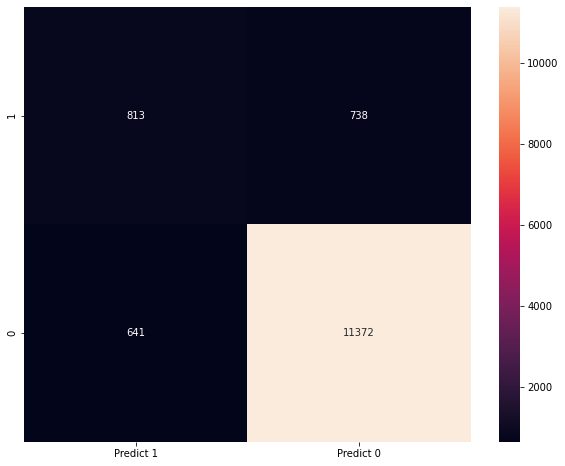

In [0]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred_RF, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True,fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, pred_RF, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.52      0.54      1551
           0       0.94      0.95      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.75      0.74      0.74     13564
weighted avg       0.90      0.90      0.90     13564



In [0]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': acc_RF, 'precision': pre_RF, 'recall' : rec_RF ,'f1 Score' : f1_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]



# 6- Adaboost 

In [0]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

In [0]:
pred_AB =abcl.predict(x_test)
acc_AB = accuracy_score(y_test, pred_AB)
pre_AB = precision_score(y_test,pred_AB, average='weighted')
rec_AB = recall_score(y_test, pred_AB, average='weighted')
f1_AB = f1_score(y_test, pred_AB, average='weighted')

Confusion Matrix


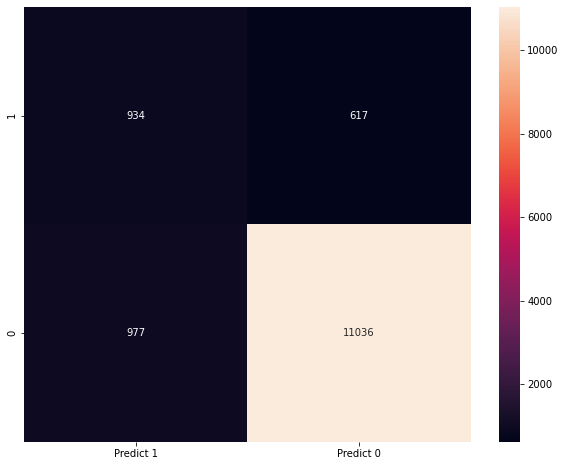

In [0]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred_AB, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True,fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, pred_AB, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.49      0.60      0.54      1551
           0       0.95      0.92      0.93     12013

    accuracy                           0.88     13564
   macro avg       0.72      0.76      0.74     13564
weighted avg       0.89      0.88      0.89     13564



In [0]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['ADA Boost'], 'accuracy': acc_AB, 'precision': pre_AB, 'recall' : rec_AB ,'f1 Score' : f1_AB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]


# 7- Bagging Classifier 

In [0]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)

In [0]:
pred_BG =bgcl.predict(x_test)
acc_BG = accuracy_score(y_test, pred_BG)
pre_BG = precision_score(y_test,pred_BG, average='weighted')
rec_BG = recall_score(y_test, pred_BG, average='weighted')
f1_BG = f1_score(y_test, pred_BG, average='weighted')

Confusion Matrix


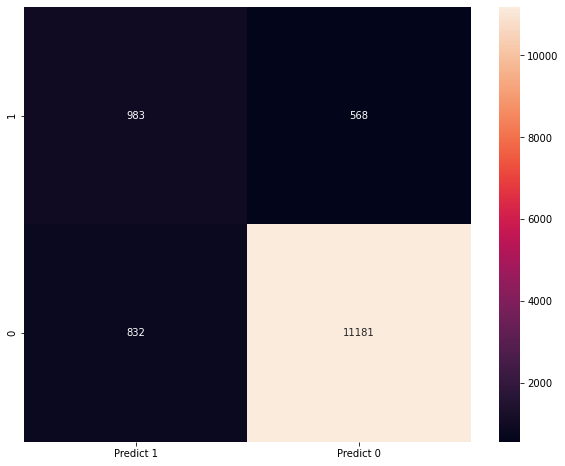

In [0]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred_BG, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True,fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, pred_BG, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.54      0.63      0.58      1551
           0       0.95      0.93      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.75      0.78      0.76     13564
weighted avg       0.90      0.90      0.90     13564



In [0]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': acc_BG, 'precision': pre_BG, 'recall' : rec_BG ,'f1 Score' : f1_BG})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]


# 8- Gradient Boost 

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)
pred_GB =gbcl.predict(x_test)


In [0]:
acc_GB = accuracy_score(y_test, pred_GB)
pre_GB = precision_score(y_test,pred_GB, average='weighted')
rec_GB = recall_score(y_test, pred_GB, average='weighted')
f1_GB = f1_score(y_test, pred_GB, average='weighted')

Confusion Matrix


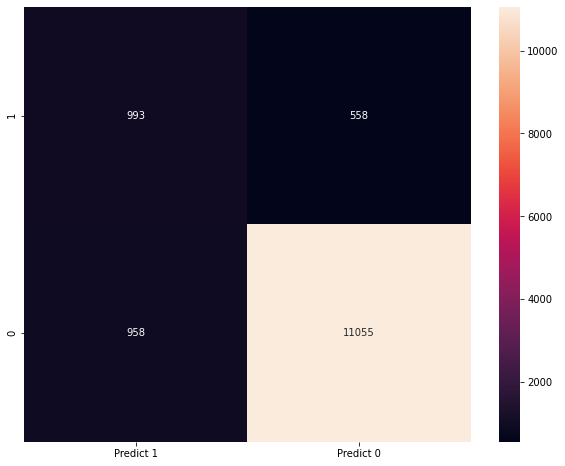

In [0]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred_GB, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True,fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, pred_GB, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.51      0.64      0.57      1551
           0       0.95      0.92      0.94     12013

    accuracy                           0.89     13564
   macro avg       0.73      0.78      0.75     13564
weighted avg       0.90      0.89      0.89     13564



In [0]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': acc_GB, 'precision': pre_GB, 'recall' : rec_GB ,'f1 Score' : f1_GB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]


# ROC Curve (Receiver Operating Characteristic):

In [0]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
GB_fpr, GB_tpr, GB_thresold = roc_curve(y_test, pred_GB)
BG_fpr, BG_tpr, BG_thresold = roc_curve(y_test, pred_BG)
RF_fpr, RF_tpr, RF_thresold = roc_curve(y_test, pred_RF)

In [0]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_test, pred_GB))
print('Bagging Classifier: ', roc_auc_score(y_test, pred_BG))
print('Random Forest: ', roc_auc_score(y_test, pred_RF))

Gradient Boost Classifier Score:  0.7802425837515483
Bagging Classifier:  0.782263175778357
Random Forest:  0.7354095442381006


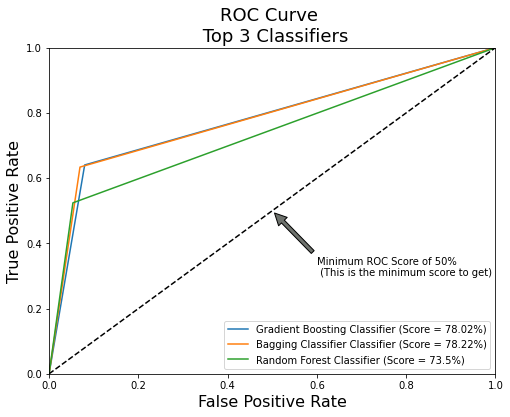

In [0]:
def graph_roc_curve_multiple(GB_fpr, GB_tpr, BG_fpr, BG_tpr, RF_fpr, RF_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(GB_fpr, GB_tpr, label='Gradient Boosting Classifier (Score = 78.02%)')
    plt.plot(BG_fpr, BG_tpr, label='Bagging Classifier Classifier (Score = 78.22%)')
    plt.plot(RF_fpr, RF_tpr, label='Random Forest Classifier (Score = 73.5%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(GB_fpr, GB_tpr, BG_fpr, BG_tpr, RF_fpr, RF_tpr)
plt.show()

# Hyper Parameter Tuning using Grid Search CV for Best - Random Forest


## Random Forest


In [0]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=1)


In [0]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [0]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [0]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [0]:
rfc1=RandomForestClassifier(random_state=1, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [0]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:

pred_RF_CV = rfc1.predict(x_test)
acc_RF_CV = accuracy_score(y_test, pred_RF_CV)
pre_RF_CV = precision_score(y_test,pred_RF_CV, average='weighted')
rec_RF_CV = recall_score(y_test, pred_RF_CV, average='weighted')
f1_RF_CV = f1_score(y_test, pred_RF_CV, average='weighted')

Confusion Matrix


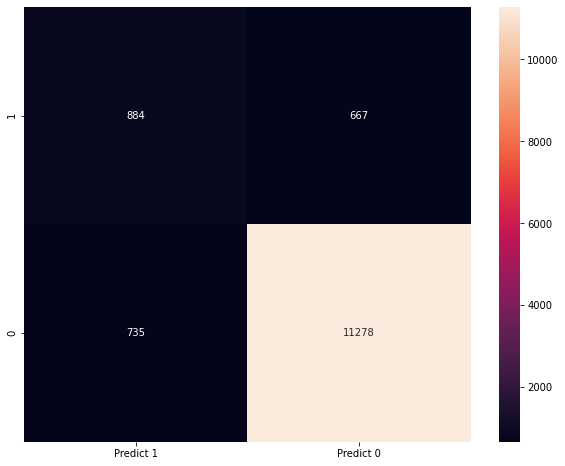

In [0]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, pred_RF_CV, labels=[1 ,0])

df_cm = pd.DataFrame(cm, index = [i for i in [1,0]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (10,8))
sns.heatmap(df_cm, annot=True,fmt='g')

In [0]:
print("Classification Report")
print(metrics.classification_report(y_test, pred_RF_CV, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.55      0.57      0.56      1551
           0       0.94      0.94      0.94     12013

    accuracy                           0.90     13564
   macro avg       0.75      0.75      0.75     13564
weighted avg       0.90      0.90      0.90     13564



In [0]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Random Forest_CV'], 'accuracy': acc_RF_CV, 'precision': pre_RF_CV, 'recall' : rec_RF_CV ,'f1 Score' : f1_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy','precision','recall','f1 Score']]
resultsDf[1:10]

,Method,accuracy,precision,recall,f1 Score
0,Naive Bayes,0.856532,0.874326,0.856532,0.864280
0,K Nearest Neighbours,0.859260,0.886059,0.859260,0.869996
0,Decision Tree,0.784134,0.887378,0.784134,0.817818
0,Random Forest,0.900619,0.897517,0.900619,0.898958
0,ADA Boost,0.882483,0.894647,0.882483,0.887699
0,Bagging,0.896786,0.904767,0.896786,0.900260
0,Gradient Boost,0.888234,0.901297,0.888234,0.893670
0,Random Forest,0.903126,0.899601,0.903126,0.901208
0,Random Forest_CV,0.896638,0.898634,0.896638,0.897600


# Analysis 

* The best model is Random Forest with Accuracy of 90.3%
* Precision (weighted) - 89%
* Recall (weighted) - 90.3% 
* F1 Score - 90.1 %
* The AUC score of - 73.5%